# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [8]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
fraud_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


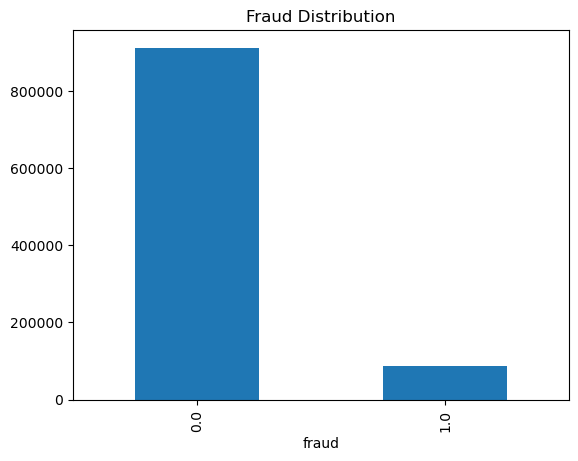

In [10]:
import matplotlib.pyplot as plt
print(fraud_df["fraud"].value_counts(normalize=True) * 100)

fraud_df["fraud"].value_counts().plot(kind="bar", title="Fraud Distribution")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Split data
X = fraud_df.drop("fraud", axis=1)
y = fraud_df["fraud"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, class_weight=None, random_state=42)
log_reg.fit(X_train_norm, y_train)

pred = log_reg.predict(X_test_norm)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    273779
         1.0       0.92      0.39      0.55     26221

    accuracy                           0.94    300000
   macro avg       0.93      0.69      0.76    300000
weighted avg       0.94      0.94      0.93    300000

Confusion Matrix:
 [[272836    943]
 [ 15918  10303]]


In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train_norm, y_train)

log_reg_ros = LogisticRegression(max_iter=1000, random_state=42)
log_reg_ros.fit(X_res, y_res)

pred_ros = log_reg_ros.predict(X_test_norm)

print("Oversampling Report:\n", classification_report(y_test, pred_ros))

Oversampling Report:
               precision    recall  f1-score   support

         0.0       0.99      0.92      0.96    273779
         1.0       0.54      0.92      0.68     26221

    accuracy                           0.92    300000
   macro avg       0.77      0.92      0.82    300000
weighted avg       0.95      0.92      0.93    300000



In [14]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_norm, y_train)

log_reg_rus = LogisticRegression(max_iter=1000, random_state=42)
log_reg_rus.fit(X_res, y_res)

pred_rus = log_reg_rus.predict(X_test_norm)

print("Undersampling Report:\n", classification_report(y_test, pred_rus))

Undersampling Report:
               precision    recall  f1-score   support

         0.0       0.99      0.89      0.94    273779
         1.0       0.44      0.91      0.59     26221

    accuracy                           0.89    300000
   macro avg       0.72      0.90      0.77    300000
weighted avg       0.94      0.89      0.91    300000



In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_norm, y_train)

log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_res, y_res)

pred_smote = log_reg_smote.predict(X_test_norm)

print("SMOTE Report:\n", classification_report(y_test, pred_smote))

SMOTE Report:
               precision    recall  f1-score   support

         0.0       0.99      0.92      0.96    273779
         1.0       0.54      0.92      0.68     26221

    accuracy                           0.92    300000
   macro avg       0.77      0.92      0.82    300000
weighted avg       0.95      0.92      0.93    300000

